In [1]:
import pymks 

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Prediction of Local Strain Field with Localization

## Calibration Data Generation

In this example the `MKSLocalizationModel` is used to predict
the local strain field for a three phase microstructure with
elastic moduli values of 80 MPa, 100 MPa and 120 MPa; Poisson's
ratio values all equal to 0.3 and a macroscopic imposed strain
equal to 0.02. The model is calibrated using delta microstructures
(analogous to using a unit impulse response to find the kernel of
a system in signal processing) [REF]. The the material parameters
specified above are used in a finite element simulation using the
`make_elasticFEstrain_delta` function from `pymks.datasets`. The
number of Poisson's ratio and elastic moduli values indicates the
number of phases.

In [2]:
from pymks.datasets import make_elastic_FE_strain_delta
import numpy as np

n = 21
n_phases = 3

elastic_modulus = (80, 100, 120)
poissons_ratio = (0.3, 0.3, 0.3)
macro_strain = 0.02
size = (n, n)

X_delta, strains_delta = make_elastic_FE_strain_delta(
    elastic_modulus=elastic_modulus,
    poissons_ratio=poissons_ratio,
    size=size, macro_strain=macro_strain)

Delta microstructures are composed of only two phases with the
center of the microstructure being a different phase from the rest.
All permutations of thes delta microstructures and their associated
strain fields $\varepsilon_{xx}$ are needed to create calibrate the
model. A delta microstructure and it's strain field can be visualized
using `draw_microstructure_strain` from `pymks.tools`.

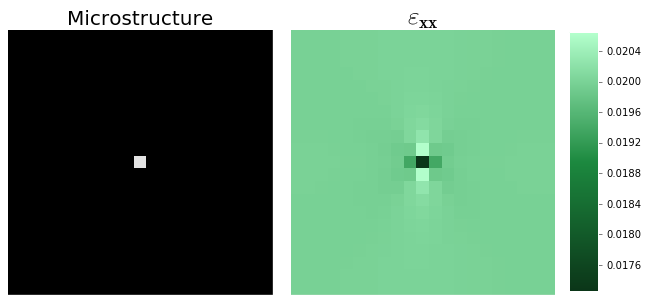

In [3]:
from pymks.tools import draw_microstructure_strain

draw_microstructure_strain(X_delta[0], strains_delta[0])

## Calibration of the Localization Model

In order to make an instance of the `MKSHomogenizationModel`, an
instance of a basis class must first be created to specify the
discretization methods for the microstructure function (see Fig. REF).
For this particular example, there are 3 discrete phases,
therefore the `PrimitiveBasis` from `pymks.bases` will be used. The
microstructure contains only two phases denoted by 0, 1 and 2, therefore
we have three local states with a domain from 0 to 2. An instance of the
`PrimitiveBasis` with these parameters can be used to create an instance
of the `MKSHomgenizationModel` as follows. 

In [4]:
from pymks import MKSLocalizationModel
from pymks import PrimitiveBasis

p_basis =PrimitiveBasis(n_states=3, domain=[0, 2])
model = MKSLocalizationModel(basis=p_basis)

With the delta microstructures and their strain fields, the influence
kernels can be calibrated using the `fit` method.

A visualization of the influence kernels can be generated using the
`draw_coeff` function from `pymks.tools`.

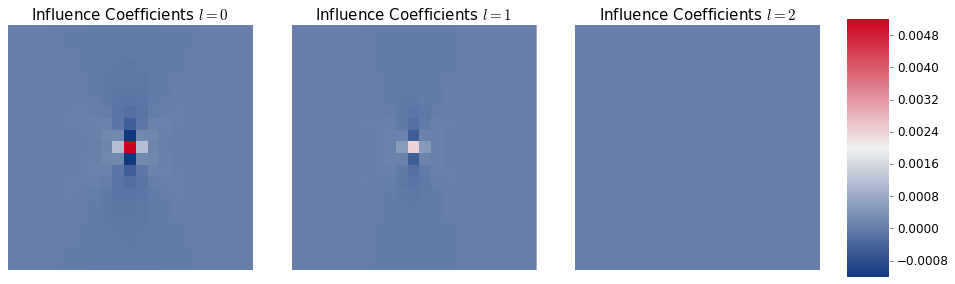

In [5]:
from pymks.tools import draw_coeff

model.fit(X_delta, strains_delta)
draw_coeff(model.coef_)

## Prediction of the Strain Field for a Random Microstructure

Our model is validated by comparing strain fields computed using
a finite element simulation and our model. The `make_elasticFEstrain_random`
function from `pymks.datasets` generates a random microstructure and
its strain field results from finite element analysis.

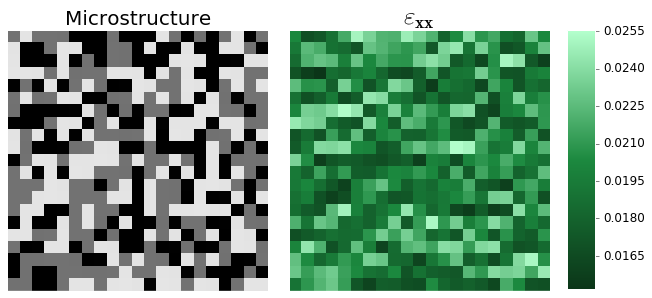

In [6]:
from pymks.datasets import make_elastic_FE_strain_random

np.random.seed(101)

X, strain = make_elastic_FE_strain_random(
    n_samples=1, elastic_modulus=elastic_modulus,
    poissons_ratio=poissons_ratio, size=size,
    macro_strain=macro_strain)

draw_microstructure_strain(X[0] , strain[0])

Localization model predicts the strain field by passing the
microstructure to the `predict` method. A visualization of
the two strain fields from both the localization model and
finite element analysis can be created using
`draw_strains_compare` from `pymks.tools`.

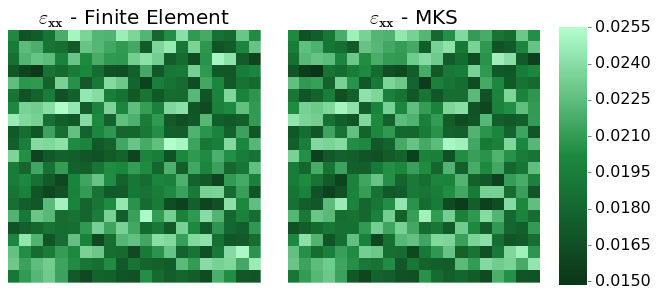

In [7]:
from pymks.tools import draw_strains_compare

strain_pred = model.predict(X)
draw_strains_compare(strain[0], strain_pred[0])

The `MKSLocalizationModel` has created a Localization
linkage for microstructures and their local strain field.